In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinatins.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude. 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library. 
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
#requests.get(url+"&q=Boston").json()

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities. 
    try: 
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | quchan
Processing Record 3 of Set 1 | burnie
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | sorland
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | buston
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | flinders
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | vanavara
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | aljezur
Processing Record 17 of Set 1 | maragogi
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | basavakalyan
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | lewistown
Processing Record 23

Processing Record 37 of Set 4 | sungaipenuh
Processing Record 38 of Set 4 | sidi ali
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | khani
Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | rundu
Processing Record 45 of Set 4 | goalpara
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | kiama
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | mareeba
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | kieta
Processing Record 5 of Set 5 | yanahuanca
Processing Record 6 of Set 5 | kainantu
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | enid
Processing Record 9 of Set 5 | san patricio


Processing Record 28 of Set 8 | skibbereen
Processing Record 29 of Set 8 | cabo rojo
Processing Record 30 of Set 8 | saurimo
Processing Record 31 of Set 8 | kamogawa
Processing Record 32 of Set 8 | nianzishan
Processing Record 33 of Set 8 | areosa
Processing Record 34 of Set 8 | iqaluit
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | aksarka
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | tidore
City not found. Skipping...
Processing Record 39 of Set 8 | saint anthony
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | almaznyy
Processing Record 42 of Set 8 | sao joao da barra
Processing Record 43 of Set 8 | bitam
Processing Record 44 of Set 8 | myitkyina
Processing Record 45 of Set 8 | assiniboia
Processing Record 46 of Set 8 | tabory
Processing Record 47 of Set 8 | larap
Processing Record 48 of Set 8 | merauke
Processing Record 49 of Set 8 | paamiut
Processing Record 50 of Set 8 | smithers
Processing Record 1 of Set 9 |

Processing Record 18 of Set 12 | masuguru
Processing Record 19 of Set 12 | niksic
Processing Record 20 of Set 12 | novoagansk
Processing Record 21 of Set 12 | waimana
Processing Record 22 of Set 12 | wangaratta
Processing Record 23 of Set 12 | banjarmasin
Processing Record 24 of Set 12 | pendencias
Processing Record 25 of Set 12 | agadez
Processing Record 26 of Set 12 | saint-augustin
Processing Record 27 of Set 12 | arlit
Processing Record 28 of Set 12 | lisakovsk
Processing Record 29 of Set 12 | alappuzha
Processing Record 30 of Set 12 | bandrele
Processing Record 31 of Set 12 | pochutla
Processing Record 32 of Set 12 | charters towers
Processing Record 33 of Set 12 | noumea
Processing Record 34 of Set 12 | mitu
Processing Record 35 of Set 12 | xiongzhou
Processing Record 36 of Set 12 | loreto
Processing Record 37 of Set 12 | kununurra
Processing Record 38 of Set 12 | ferrol
Processing Record 39 of Set 12 | samfya
Processing Record 40 of Set 12 | potosi
Processing Record 41 of Set 12

In [11]:
len(city_data)

577

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,44.49,79,98,6.44,RU,2021-09-22 04:48:40
1,Quchan,37.1060,58.5095,69.28,26,10,7.52,IR,2021-09-22 04:48:41
2,Burnie,-41.0667,145.9167,67.91,64,1,13.18,AU,2021-09-22 04:48:41
3,Kapaa,22.0752,-159.3190,84.18,72,40,3.00,US,2021-09-22 04:47:34
4,Sorland,67.6670,12.6934,50.07,90,100,51.34,NO,2021-09-22 04:47:31
5,Sinnamary,5.3833,-52.9500,78.51,87,72,8.55,GF,2021-09-22 04:48:42
6,Buston,40.2342,69.6948,71.78,24,0,8.95,TJ,2021-09-22 04:48:42
7,Albany,42.6001,-73.9662,64.31,90,100,1.01,US,2021-09-22 04:44:44
8,Flinders,-34.5833,150.8552,67.17,54,8,8.99,AU,2021-09-22 04:47:08
9,Rikitea,-23.1203,-134.9692,73.85,72,0,15.32,PF,2021-09-22 04:48:43


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-09-22 04:48:40,59.7035,30.7861,44.49,79,98,6.44
1,Quchan,IR,2021-09-22 04:48:41,37.1060,58.5095,69.28,26,10,7.52
2,Burnie,AU,2021-09-22 04:48:41,-41.0667,145.9167,67.91,64,1,13.18
3,Kapaa,US,2021-09-22 04:47:34,22.0752,-159.3190,84.18,72,40,3.00
4,Sorland,NO,2021-09-22 04:47:31,67.6670,12.6934,50.07,90,100,51.34
5,Sinnamary,GF,2021-09-22 04:48:42,5.3833,-52.9500,78.51,87,72,8.55
6,Buston,TJ,2021-09-22 04:48:42,40.2342,69.6948,71.78,24,0,8.95
7,Albany,US,2021-09-22 04:44:44,42.6001,-73.9662,64.31,90,100,1.01
8,Flinders,AU,2021-09-22 04:47:08,-34.5833,150.8552,67.17,54,8,8.99
9,Rikitea,PF,2021-09-22 04:48:43,-23.1203,-134.9692,73.85,72,0,15.32


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [15]:
weather_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(weather_data_to_load)
city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Nikolskoye,RU,2021-09-22 04:48:40,59.7035,30.7861,44.49,79,98,6.44
1,1,Quchan,IR,2021-09-22 04:48:41,37.1060,58.5095,69.28,26,10,7.52
2,2,Burnie,AU,2021-09-22 04:48:41,-41.0667,145.9167,67.91,64,1,13.18
3,3,Kapaa,US,2021-09-22 04:47:34,22.0752,-159.3190,84.18,72,40,3.00
4,4,Sorland,NO,2021-09-22 04:47:31,67.6670,12.6934,50.07,90,100,51.34


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

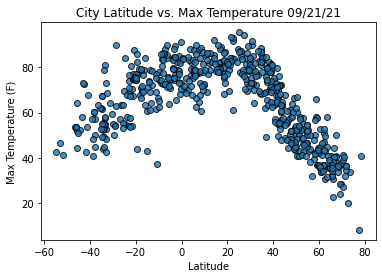

In [17]:
# Import the time module
import time

# Build the scatter plot for the latitude versus max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

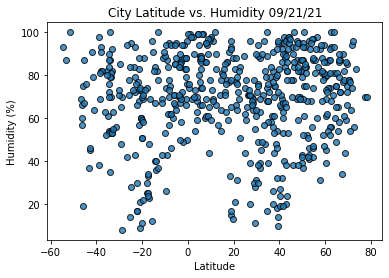

In [18]:
# Build the scatter plot for the latitude versus humidity.
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

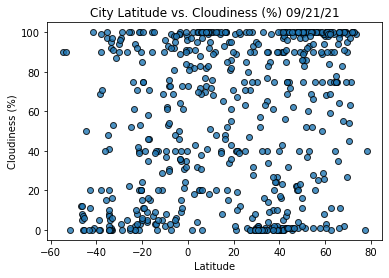

In [19]:
# Build the scatter plot for the latitude versus cloudiness.
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

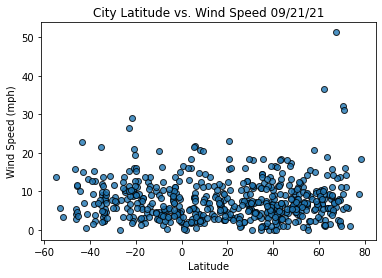

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid=True
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show the plot.
plt.show()